In [1]:
import pandas as pd

df = pd.read_csv('data\\top5_midfield.csv')
df.head()

,player,age,nationality,position,team,games,minutes_90s,goals,assists,pens_att,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Brenden Aaronson,22,us USA,"MF,FW",Union Berlin,30.0,14.1,2.0,2.0,0.0,...,15.0,25.0,5.0,0.0,0.0,0.0,88.0,13.0,16.0,44.8
1,Paxten Aaronson,19,us USA,MF,Eint Frankfurt,7.0,1.1,0.0,1.0,0.0,...,6.0,4.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,100.0
2,Amine Adli,23,ma MAR,"MF,FW",Leverkusen,23.0,10.0,4.0,6.0,0.0,...,14.0,28.0,7.0,0.0,0.0,0.0,36.0,21.0,22.0,48.8
3,Kofi Amoako,18,de GER,MF,Wolfsburg,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Robert Andrich,28,de GER,"MF,DF",Leverkusen,28.0,18.8,4.0,2.0,0.0,...,23.0,14.0,0.0,0.0,0.0,0.0,122.0,20.0,22.0,47.6


In [2]:
turn_per90 = ['npxg_xg_assist', 'progressive_carries', 'progressive_passes', 'progressive_passes_received',
              'shots_free_kicks', 'passes_completed', 'passes', 'passes_short', 'passes_medium',
              'passes_long', 'pass_xa', 'key_passes', 'passes_into_final_third', 'passes_into_penalty_area',
              'crosses_into_penalty_area', 'passes_live', 'passes_dead', 'passes_free_kicks',
              'through_balls', 'passes_switches', 'crosses', 'throw_ins', 'corner_kicks', 'corner_kicks_in',
              'corner_kicks_out', 'passes_offsides', 'passes_blocked', 'sca_passes_live', 'sca_passes_dead',
              'sca_take_ons', 'sca_shots', 'sca_fouled', 'sca_defense', 'tackles', 'tackles_won',
              'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd', 'challenge_tackles', 'challenges',
              'blocks', 'interceptions', 'clearances', 'touches', 'touches_def_pen_area', 'touches_def_3rd',
              'touches_mid_3rd', 'touches_att_3rd', 'touches_att_pen_area', 'touches_live_ball',
              'take_ons', 'carries', 'carries_distance', 'passes_total_distance', 'passes_progressive_distance',
              'carries_progressive_distance', 'carries_into_final_third', 'carries_into_penalty_area',
              'miscontrols', 'dispossessed', 'passes_received', 'fouls', 'fouled', 'ball_recoveries',
              'aerials_won', 'aerials_lost']

rename = {}

for col in turn_per90:
    rename[col] = f'{col}_per90'

In [3]:
for col in turn_per90:
    df[col] = df[col] / df['minutes_90s']

In [4]:
df = df.rename(columns = rename)

In [5]:
len(df[(df.games >= 10) & (df.minutes_90s >= 8)]), len(df)

(541, 879)

In [6]:
df = df[(df.games >= 10) & (df.minutes_90s >= 8)].reset_index()
df.drop('index', axis = 1, inplace = True)
df

,player,age,nationality,position,team,games,minutes_90s,goals,assists,pens_att,...,fouls_per90,fouled_per90,offsides,pens_won,pens_conceded,own_goals,ball_recoveries_per90,aerials_won_per90,aerials_lost_per90,aerials_won_pct
0,Brenden Aaronson,22,us USA,"MF,FW",Union Berlin,30.0,14.1,2.0,2.0,0.0,...,1.063830,1.773050,5.0,0.0,0.0,0.0,6.241135,0.921986,1.134752,44.8
1,Amine Adli,23,ma MAR,"MF,FW",Leverkusen,23.0,10.0,4.0,6.0,0.0,...,1.400000,2.800000,7.0,0.0,0.0,0.0,3.600000,2.100000,2.200000,48.8
2,Robert Andrich,28,de GER,"MF,DF",Leverkusen,28.0,18.8,4.0,2.0,0.0,...,1.223404,0.744681,0.0,0.0,0.0,0.0,6.489362,1.063830,1.170213,47.6
3,Maximilian Arnold,29,de GER,MF,Wolfsburg,30.0,27.8,2.0,1.0,0.0,...,1.330935,1.654676,0.0,0.0,0.0,0.0,6.258993,0.503597,1.079137,31.8
4,Leandro Barreiro Martins,23,lu LUX,MF,Mainz 05,31.0,29.0,4.0,1.0,0.0,...,2.000000,1.793103,3.0,0.0,0.0,0.0,4.965517,1.344828,2.172414,38.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Maxime Lopez,25,fr FRA,MF,Fiorentina/Sassuolo,21.0,10.5,0.0,0.0,0.0,...,0.952381,0.666667,0.0,0.0,0.0,0.0,5.333333,0.285714,0.571429,33.3
537,Ryan Gravenberch,21,nl NED,MF,Bayern Munich/Liverpool,27.0,12.6,1.0,0.0,0.0,...,1.666667,1.190476,0.0,0.0,0.0,0.0,5.873016,0.793651,1.111111,41.7
538,Lovro Majer,25,hr CRO,"MF,FW",Wolfsburg/Rennes,33.0,23.6,5.0,5.0,2.0,...,1.567797,1.610169,1.0,1.0,0.0,0.0,6.144068,0.466102,0.762712,37.9
539,Julian Justvan,25,de GER,"MF,FW",Hoffenheim/Darmstadt 98,18.0,11.9,2.0,2.0,0.0,...,0.168067,0.420168,0.0,0.0,0.0,0.0,4.621849,0.084034,1.260504,6.2


In [7]:
ind = ['player', 'age', 'nationality', 'position', 'team', 'minutes_90s']
df.set_index(ind, inplace = True)
df

,,,,,,games,goals,assists,pens_att,cards_yellow,cards_red,xg,npxg,xg_assist,npxg_xg_assist_per90,...,fouls_per90,fouled_per90,offsides,pens_won,pens_conceded,own_goals,ball_recoveries_per90,aerials_won_per90,aerials_lost_per90,aerials_won_pct
player,age,nationality,position,team,minutes_90s,,,,,,,,,,,,,,,,,,,,,
Brenden Aaronson,22,us USA,"MF,FW",Union Berlin,14.1,30.0,2.0,2.0,0.0,3.0,1.0,2.0,2.0,1.9,0.269504,...,1.063830,1.773050,5.0,0.0,0.0,0.0,6.241135,0.921986,1.134752,44.8
Amine Adli,23,ma MAR,"MF,FW",Leverkusen,10.0,23.0,4.0,6.0,0.0,5.0,0.0,3.3,3.3,2.3,0.560000,...,1.400000,2.800000,7.0,0.0,0.0,0.0,3.600000,2.100000,2.200000,48.8
Robert Andrich,28,de GER,"MF,DF",Leverkusen,18.8,28.0,4.0,2.0,0.0,4.0,0.0,1.7,1.7,1.8,0.186170,...,1.223404,0.744681,0.0,0.0,0.0,0.0,6.489362,1.063830,1.170213,47.6
Maximilian Arnold,29,de GER,MF,Wolfsburg,27.8,30.0,2.0,1.0,0.0,9.0,0.0,1.0,1.0,3.9,0.176259,...,1.330935,1.654676,0.0,0.0,0.0,0.0,6.258993,0.503597,1.079137,31.8
Leandro Barreiro Martins,23,lu LUX,MF,Mainz 05,29.0,31.0,4.0,1.0,0.0,8.0,0.0,4.5,4.5,1.1,0.193103,...,2.000000,1.793103,3.0,0.0,0.0,0.0,4.965517,1.344828,2.172414,38.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maxime Lopez,25,fr FRA,MF,Fiorentina/Sassuolo,10.5,21.0,0.0,0.0,0.0,1.0,1.0,0.2,0.2,0.8,0.095238,...,0.952381,0.666667,0.0,0.0,0.0,0.0,5.333333,0.285714,0.571429,33.3
Ryan Gravenberch,21,nl NED,MF,Bayern Munich/Liverpool,12.6,27.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,1.1,0.246032,...,1.666667,1.190476,0.0,0.0,0.0,0.0,5.873016,0.793651,1.111111,41.7
Lovro Majer,25,hr CRO,"MF,FW",Wolfsburg/Rennes,23.6,33.0,5.0,5.0,2.0,5.0,0.0,5.4,3.8,3.5,0.309322,...,1.567797,1.610169,1.0,1.0,0.0,0.0,6.144068,0.466102,0.762712,37.9


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

df_standardized = pd.DataFrame(df_standardized, columns = df.columns, index = df.index)
df_standardized

,,,,,,games,goals,assists,pens_att,cards_yellow,cards_red,xg,npxg,xg_assist,npxg_xg_assist_per90,...,fouls_per90,fouled_per90,offsides,pens_won,pens_conceded,own_goals,ball_recoveries_per90,aerials_won_per90,aerials_lost_per90,aerials_won_pct
player,age,nationality,position,team,minutes_90s,,,,,,,,,,,,,,,,,,,,,
Brenden Aaronson,22,us USA,"MF,FW",Union Berlin,14.1,0.359466,-0.167899,-0.145227,-0.307572,-0.548704,2.118434,-0.235881,-0.138825,-0.222787,0.263908,...,-0.517259,0.703012,0.904250,-0.402951,-0.425384,-0.156911,0.709458,-0.085212,-0.009671,0.068213
Amine Adli,23,ma MAR,"MF,FW",Leverkusen,10.0,-0.819148,0.592214,1.544398,-0.307572,0.133707,-0.394884,0.364535,0.569705,-0.025766,2.205636,...,0.085777,2.335530,1.561777,-0.402951,-0.425384,-0.156911,-1.544473,1.572686,1.726579,0.366299
Robert Andrich,28,de GER,"MF,DF",Leverkusen,18.8,0.022720,0.592214,-0.145227,-0.307572,-0.207498,-0.394884,-0.374438,-0.302332,-0.272042,-0.293107,...,-0.231008,-0.931762,-0.739565,-0.402951,-0.425384,-0.156911,0.921293,0.114415,0.048127,0.276873
Maximilian Arnold,29,de GER,MF,Wolfsburg,27.8,0.359466,-0.167899,-0.567633,-0.307572,1.498529,-0.394884,-0.697739,-0.683848,0.762319,-0.359355,...,-0.038114,0.514836,-0.739565,-0.402951,-0.425384,-0.156911,0.724698,-0.674038,-0.100318,-0.900569
Leandro Barreiro Martins,23,lu LUX,MF,Mainz 05,29.0,0.527840,0.592214,-0.567633,-0.307572,1.157323,-0.394884,0.918765,1.223733,-0.616829,-0.246764,...,1.162081,0.734891,0.246724,-0.402951,-0.425384,-0.156911,-0.379148,0.509882,1.681616,-0.423630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maxime Lopez,25,fr FRA,MF,Fiorentina/Sassuolo,10.5,-1.155895,-0.928013,-0.990039,-0.307572,-1.231114,2.118434,-1.067226,-1.119867,-0.764595,-0.900913,...,-0.717180,-1.055779,-0.739565,-0.402951,-0.425384,-0.156911,-0.065256,-0.980679,-0.927833,-0.788786
Ryan Gravenberch,21,nl NED,MF,Bayern Munich/Liverpool,12.6,-0.145654,-0.547956,-0.990039,-0.307572,-1.231114,-0.394884,-0.235881,-0.138825,-0.616829,0.107018,...,0.564134,-0.223091,-0.739565,-0.402951,-0.425384,-0.156911,0.395307,-0.265826,-0.048203,-0.162804
Lovro Majer,25,hr CRO,"MF,FW",Wolfsburg/Rennes,23.6,0.864587,0.972271,1.121992,1.594101,0.133707,-0.394884,1.334438,0.842217,0.565298,0.530061,...,0.386777,0.444085,-0.410802,1.966576,-0.425384,-0.156911,0.626621,-0.726808,-0.616060,-0.445987


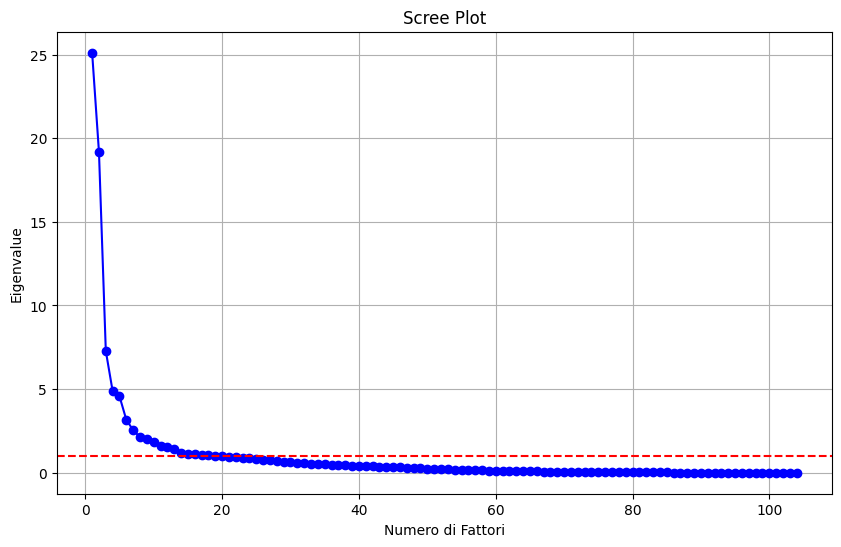

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10,Factor_11,Factor_12,Factor_13,Factor_14,Factor_15,Factor_16,Factor_17,Factor_18,Factor_19,Factor_20
Eigenvalue,24.957622,19.075049,7.133987,4.709973,4.328877,3.033313,2.319331,1.926309,1.726103,1.582933,1.368635,1.304942,1.120940,0.957476,0.847318,0.761161,0.713305,0.703440,0.578328,0.456304
Proporzione Varianza,0.239977,0.183414,0.068596,0.045288,0.041624,0.029166,0.022301,0.018522,0.016597,0.015221,0.013160,0.012548,0.010778,0.009207,0.008147,0.007319,0.006859,0.006764,0.005561,0.004388
Varianza Cumulativa,0.239977,0.423391,0.491987,0.537275,0.578899,0.608066,0.630367,0.648889,0.665486,0.680707,0.693867,0.706414,0.717192,0.726399,0.734546,0.741865,0.748724,0.755488,0.761048,0.765436


In [9]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

nfac = 20

fa = FactorAnalyzer(n_factors=nfac, rotation=None)
fa.fit(df_standardized)

eigenvalues, _ = fa.get_eigenvalues()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Numero di Fattori')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

var = fa.get_factor_variance()
pd.DataFrame(var, columns = [f'Factor_{i}' for i in range(1, fa.n_factors + 1)], index = ['Eigenvalue', 'Proporzione Varianza', 'Varianza Cumulativa'])

In [10]:
coms = fa.get_communalities()
coms = pd.DataFrame(coms, index = df.columns, columns = ['communality'])
coms.sort_values(by = 'communality', ascending = False)

,communality
xg,1.000638
passes_per90,0.998526
aerials_won_per90,0.998376
passes_completed_per90,0.998241
touches_live_ball_per90,0.997477
...,...
errors,0.189706
sca_defense_per90,0.125516
pens_conceded,0.107330
own_goals,0.087792


In [14]:
coms.describe()

,communality
count,104.000000
mean,0.765436
std,0.242678
min,0.037966
25%,0.611292
50%,0.883248
75%,0.940542
max,1.000638


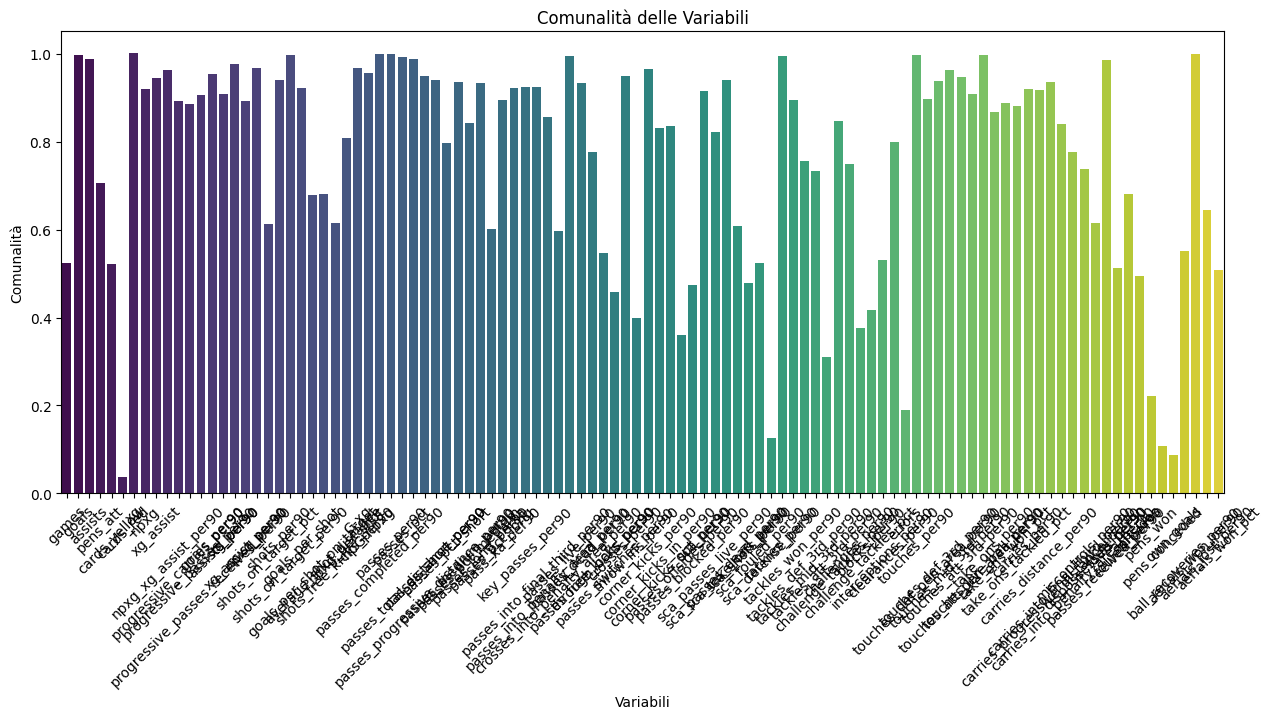

In [15]:
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.barplot(x=coms.index, y=coms['communality'], palette='viridis', hue = coms.index, legend = False)
plt.title('Comunalità delle Variabili')
plt.xlabel('Variabili')
plt.ylabel('Comunalità')
plt.xticks(rotation=45)
plt.show()

In [23]:
import numpy as np
scores = fa.transform(df_standardized)
colss = [f'Factor_{i}' for i in range(1, 21)]
pd.DataFrame(np.corrcoef(scores, rowvar=False), columns = colss, index = colss)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10,Factor_11,Factor_12,Factor_13,Factor_14,Factor_15,Factor_16,Factor_17,Factor_18,Factor_19,Factor_20
Factor_1,1.000000,0.557285,-0.310975,-0.672541,-0.883905,-0.794111,-0.302101,-0.292890,0.891718,-0.744792,0.811022,0.718180,0.463305,-0.245538,-0.919931,-0.430598,0.897243,0.339571,0.679095,-0.947449
Factor_2,0.557285,1.000000,0.188591,-0.055172,-0.332753,-0.754358,-0.638119,-0.644589,0.719580,-0.717001,0.738378,0.754604,0.704563,-0.621248,-0.649215,-0.657483,0.361726,0.642292,0.098122,-0.650601
Factor_3,-0.310975,0.188591,1.000000,0.758254,0.597823,-0.146709,-0.543885,-0.608652,-0.025196,-0.199426,0.080579,0.228843,0.462001,-0.596476,0.190981,-0.511429,-0.573357,0.493196,-0.737151,0.185260
Factor_4,-0.672541,-0.055172,0.758254,1.000000,0.919928,0.182057,-0.401618,-0.455235,-0.382963,0.121974,-0.246905,-0.070528,0.255419,-0.472166,0.540557,-0.301828,-0.901492,0.339821,-0.965775,0.567058
Factor_5,-0.883905,-0.332753,0.597823,0.919928,1.000000,0.533058,-0.059770,-0.097657,-0.698805,0.469701,-0.580015,-0.429951,-0.109144,-0.131431,0.804267,0.061018,-0.994348,0.003792,-0.913522,0.830948
Factor_6,-0.794111,-0.754358,-0.146709,0.182057,0.533058,1.000000,0.788741,0.785911,-0.974993,0.934052,-0.987133,-0.987923,-0.889148,0.752131,0.908886,0.812981,-0.570144,-0.803620,-0.235721,0.898316
Factor_7,-0.302101,-0.638119,-0.543885,-0.401618,-0.059770,0.788741,1.000000,0.968163,-0.649509,0.698800,-0.770971,-0.862649,-0.974728,0.983935,0.532884,0.820948,0.010006,-0.989116,0.295682,0.458537
Factor_8,-0.292890,-0.644589,-0.608652,-0.455235,-0.097657,0.785911,0.968163,1.000000,-0.638755,0.761892,-0.737476,-0.848517,-0.965266,0.977671,0.482727,0.917704,0.052932,-0.943597,0.390639,0.453188
Factor_9,0.891718,0.719580,-0.025196,-0.382963,-0.698805,-0.974993,-0.649509,-0.638755,1.000000,-0.907169,0.977186,0.940819,0.776801,-0.601542,-0.967416,-0.703759,0.729408,0.675341,0.425583,-0.966099
Factor_10,-0.744792,-0.717001,-0.199426,0.121974,0.469701,0.934052,0.698800,0.761892,-0.907169,1.000000,-0.886509,-0.908517,-0.816109,0.690817,0.798034,0.879687,-0.499226,-0.689303,-0.118348,0.843671


In [39]:
fa_obl = FactorAnalyzer(n_factors=10, rotation='oblimin')
fa_obl.fit(df_standardized)
var = fa_obl.get_factor_variance()
pd.DataFrame(var, columns = [f'Factor_{i}' for i in range(1, fa_obl.n_factors + 1)], 
             index = ['Eigenvalue', 'Proporzione Varianza', 'Varianza Cumulativa'])

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10
Eigenvalue,14.602716,8.389868,6.383835,6.302458,4.904737,4.858304,3.757915,3.560530,3.438980,2.270715
Proporzione Varianza,0.140411,0.080672,0.061383,0.060601,0.047161,0.046714,0.036134,0.034236,0.033067,0.021834
Varianza Cumulativa,0.140411,0.221083,0.282466,0.343066,0.390227,0.436942,0.473075,0.507311,0.540378,0.562212


In [40]:
coms = fa_obl.get_communalities()
coms = pd.DataFrame(coms, index = df.columns, columns = ['communality'])
coms.sort_values(by = 'communality', ascending = False)

,communality
passes_received_per90,1.015702
tackles_per90,1.013430
npG-npxg,0.990585
G-xg,0.986291
passes_live_per90,0.955910
...,...
errors,0.124581
pens_won,0.103929
pens_conceded,0.077365
cards_red,0.030157


In [41]:
obl_loadings = pd.DataFrame(fa_obl.loadings_, columns = [f'Factor_{i}' for i in range(1, fa_obl.n_factors + 1)],
                    index = df.columns)
obl_loadings

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10
games,0.000463,-0.099908,-0.090831,0.019533,0.472387,-0.098646,-0.014629,-0.071662,0.054230,0.463981
goals,-0.014470,0.050455,-0.095385,0.454787,0.277280,0.028477,0.533215,-0.013427,-0.004575,0.328527
assists,-0.003691,0.033115,-0.008251,0.038971,0.928615,-0.022331,0.005360,0.012996,-0.046640,0.094624
pens_att,0.037156,0.321908,-0.079165,0.205152,0.098930,-0.001395,-0.030714,-0.009789,-0.027596,0.371616
cards_yellow,0.058930,-0.107821,0.185690,-0.056195,0.203825,-0.055510,-0.004590,-0.048088,0.070405,0.548797
...,...,...,...,...,...,...,...,...,...,...
own_goals,0.035977,-0.009787,-0.029018,-0.056298,-0.057437,0.041365,-0.043412,-0.124548,-0.006358,0.008498
ball_recoveries_per90,0.281487,0.040338,0.391116,-0.201329,-0.078858,0.126589,-0.003179,-0.079157,-0.019635,0.198341
aerials_won_per90,0.110780,-0.230172,0.075426,0.353620,-0.205521,-0.184224,-0.063957,-0.370402,0.430649,0.076750
aerials_lost_per90,-0.011705,-0.176664,0.012231,0.294339,-0.305164,-0.199337,-0.019896,-0.028247,0.520095,0.031534


In [42]:
obl_loadings.describe()

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.181843,0.088375,0.069521,0.096142,0.087745,0.079085,0.048329,0.002399,0.024197,0.015519
std,0.329220,0.271236,0.238954,0.227719,0.199612,0.202121,0.184733,0.185910,0.181099,0.147657
min,-0.219166,-0.308551,-0.212091,-0.393335,-0.305164,-0.291054,-0.115174,-0.724567,-0.634994,-0.247615
25%,-0.030819,-0.068935,-0.056085,-0.037913,-0.037794,-0.046642,-0.011968,-0.057201,-0.032621,-0.062978
50%,0.031434,0.004922,0.002901,0.040269,0.033254,0.024751,0.005448,0.013340,0.009837,-0.003580
75%,0.298298,0.112967,0.077883,0.130648,0.151789,0.124626,0.020476,0.083058,0.082868,0.083380
max,0.998031,0.913803,1.005579,0.869669,0.928615,0.797119,0.975418,0.361840,0.520095,0.548797


In [44]:
for i in obl_loadings.columns:
    print(f'{i}: {len(obl_loadings[np.abs(obl_loadings[i]) > 0.4])}')

Factor_1: 19
Factor_2: 13
Factor_3: 9
Factor_4: 12
Factor_5: 9
Factor_6: 8
Factor_7: 6
Factor_8: 3
Factor_9: 7
Factor_10: 2


In [46]:
for i in obl_loadings.columns:
    print(i)
    print(obl_loadings.loc[np.abs(obl_loadings[i]) > 0.4, i])
    print('-'*24)

Factor_1
progressive_passes_per90              0.806959
passes_completed_per90                0.928958
passes_per90                          0.952104
passes_pct                            0.468687
passes_total_distance_per90           0.852935
passes_progressive_distance_per90     0.781186
passes_short_per90                    0.937933
passes_pct_short                      0.447015
passes_medium_per90                   0.823582
passes_into_final_third_per90         0.868328
passes_live_per90                     0.972104
touches_per90                         0.965398
touches_def_3rd_per90                 0.449188
touches_mid_3rd_per90                 0.892785
touches_live_ball_per90               0.965619
carries_per90                         0.893631
carries_distance_per90                0.641699
carries_progressive_distance_per90    0.601357
passes_received_per90                 0.998031
Name: Factor_1, dtype: float64
------------------------
Factor_2
average_shot_distance      0.4563

factor 1 -> fulcro del gioco
factor 2 -> tiro/lancio lungo
factor 3 -> rottura
factor 4 -> tendenza offensiva
factor 5 -> incisività
factor 6 -> creatività
factor 7 -> finalizzazione
factor 8 -> avanzato
factor 9 -> incontrista
factor 10 -> sostanza

In [47]:
scores_obl = fa_obl.transform(df_standardized)
labels = ['Fulcro del Gioco', 'Tiro/Lancio Lungo', 'Rottura', 'Tendenza Offensiva', 'Incisività',
          'Creatività', 'Finalizzazione', 'Avanzato', 'Incontrista', 'Sostanza']
scores_obl = pd.DataFrame(scores_obl, columns = labels, index = df.index)
scores_obl

,,,,,,Fulcro del Gioco,Tiro/Lancio Lungo,Rottura,Tendenza Offensiva,Incisività,Creatività,Finalizzazione,Avanzato,Incontrista,Sostanza
player,age,nationality,position,team,minutes_90s,,,,,,,,,,
Brenden Aaronson,22,us USA,"MF,FW",Union Berlin,14.1,-0.408784,3.010691,13.127881,0.939448,-5.927160,1.760719,2.428931,3.364018,3.273385,-3.280436
Amine Adli,23,ma MAR,"MF,FW",Leverkusen,10.0,-0.998224,-8.308005,-7.969434,1.257478,20.218998,-3.862923,-3.573507,0.462816,-5.363591,-0.701801
Robert Andrich,28,de GER,"MF,DF",Leverkusen,18.8,3.247116,4.852885,-13.790086,-1.010672,-16.395920,3.931185,4.407352,-2.821483,3.558195,1.022244
Maximilian Arnold,29,de GER,MF,Wolfsburg,27.8,1.381519,8.418174,20.338839,0.711370,-12.995104,2.500726,4.256704,1.170364,5.257119,-3.477296
Leandro Barreiro Martins,23,lu LUX,MF,Mainz 05,29.0,3.527447,19.467321,-13.649322,2.898672,-55.801939,16.069754,10.030966,-2.781963,18.310250,7.078278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maxime Lopez,25,fr FRA,MF,Fiorentina/Sassuolo,10.5,4.885649,7.707732,-17.041958,-0.940962,-24.996128,7.076135,3.230091,-2.663124,6.339812,4.028897
Ryan Gravenberch,21,nl NED,MF,Bayern Munich/Liverpool,12.6,2.765499,18.124789,66.157806,5.942802,-36.598366,9.823327,11.270655,8.806595,17.777348,-16.067367
Lovro Majer,25,hr CRO,"MF,FW",Wolfsburg/Rennes,23.6,-82.261012,-371.065965,130.851905,-21.010888,978.068702,-287.026881,-195.363185,30.416553,-324.291461,-24.573781


In [48]:
for col in scores_obl.columns:
    player1 = scores_obl[scores_obl[col] == scores_obl[col].max()].index[0][0]
    player2 = scores_obl[scores_obl[col] == scores_obl[col].min()].index[0][0]
    print(f'{col}\ntop player: {player1}\nflop player: {player2}')

Fulcro del Gioco
top player: José Luis García Vayá
flop player: Lovro Majer
Tiro/Lancio Lungo
top player: Giacomo Bonaventura
flop player: Lovro Majer
Rottura
top player: Lovro Majer
flop player: Julian Justvan
Tendenza Offensiva
top player: Giacomo Bonaventura
flop player: James Mcatee
Incisività
top player: Lovro Majer
flop player: José Luis García Vayá
Creatività
top player: Giacomo Bonaventura
flop player: Lovro Majer
Finalizzazione
top player: José Luis García Vayá
flop player: Lovro Majer
Avanzato
top player: Lovro Majer
flop player: Julian Justvan
Incontrista
top player: José Luis García Vayá
flop player: Lovro Majer
Sostanza
top player: Giacomo Bonaventura
flop player: Romain Faivre


In [37]:
import matplotlib.pyplot as plt

def plot_factors(labels, df = scores_obl):
    x = labels[0]
    y = labels[1]
    
    fig, ax = plt.subplots(figsize = (12,7))
    colors = np.random.rand(len(df))
    
    xmin = df[x].min() 
    xmax = df[x].max() 
    ymin = df[y].min() 
    ymax = df[y].max() 
    xmed = df[x].mean()
    ymed = df[y].mean()

    xpquart = df[x].quantile(.25)
    ypquart = df[y].quantile(.25)
    xtquart = df[x].quantile(.75)
    ytquart = df[y].quantile(.75)
    
    plt.scatter(x = df[x], y = df[y], c = colors, alpha = 0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.hlines(y = ymed, xmin = xmin, xmax = xmax, linestyle = '--', color = 'grey')
    plt.vlines(x = xmed, ymin = ymin, ymax = ymax, linestyle = '--', color = 'grey')
    ax.set_xticks([])
    ax.set_yticks([])
    for point in df.index:
        xp = df.loc[point, x]
        yp = df.loc[point, y]
            
        txt = point[0]
        if ((xp > xtquart) or (xp < xpquart)) and ((yp > ytquart) or  (yp < ypquart)):
            plt.annotate(txt, xy = (xp, yp))
    plt.show()

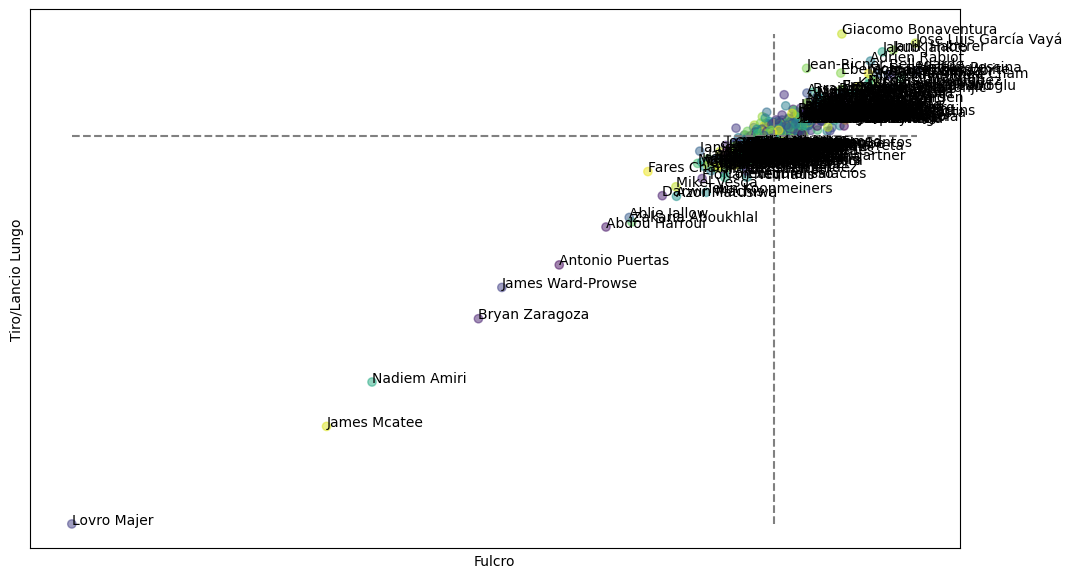

In [49]:
plot_factors(['Fulcro', 'Tiro/Lancio Lungo'])

In [50]:
pd.DataFrame(np.corrcoef(scores_obl, rowvar=False), columns = labels, index = labels)

,Fulcro del Gioco,Tiro/Lancio Lungo,Rottura,Tendenza Offensiva,Incisività,Creatività,Finalizzazione,Avanzato,Incontrista,Sostanza
Fulcro del Gioco,1.000000,0.983318,-0.203716,0.708208,-0.986643,0.986807,0.979298,-0.464920,0.981017,0.218788
Tiro/Lancio Lungo,0.983318,1.000000,-0.107583,0.777951,-0.997896,0.995079,0.996656,-0.373673,0.998819,0.162553
Rottura,-0.203716,-0.107583,1.000000,0.338291,0.159140,-0.189084,-0.086324,0.896928,-0.108720,-0.736507
Tendenza Offensiva,0.708208,0.777951,0.338291,1.000000,-0.751176,0.750221,0.773304,0.150380,0.773596,0.036197
Incisività,-0.986643,-0.997896,0.159140,-0.751176,1.000000,-0.998056,-0.994717,0.421580,-0.997791,-0.196313
Creatività,0.986807,0.995079,-0.189084,0.750221,-0.998056,1.000000,0.990014,-0.436681,0.994591,0.233531
Finalizzazione,0.979298,0.996656,-0.086324,0.773304,-0.994717,0.990014,1.000000,-0.359289,0.997040,0.117584
Avanzato,-0.464920,-0.373673,0.896928,0.150380,0.421580,-0.436681,-0.359289,1.000000,-0.377162,-0.623793
Incontrista,0.981017,0.998819,-0.108720,0.773596,-0.997791,0.994591,0.997040,-0.377162,1.000000,0.151073
Sostanza,0.218788,0.162553,-0.736507,0.036197,-0.196313,0.233531,0.117584,-0.623793,0.151073,1.000000
